# Chapter 14. Stan

* 베이지안 통계 R
* Doing Bayesian Data Analysis, Second Edition: A Tutorial with R, JAGS, and Stan
* 김무성

# Contents

* 14.1 HMC sampling
* 14.2 Installing Stan
* 14.3 A complete example
* 14.4 Specify model top-down in Stan
* 14.5 Limitations and extras

# 14.1 HMC sampling

# 14.2 Installing Stan

* http://mc-stan.org/
* RStan
    - https://github.com/stan-dev/rstan
        - https://github.com/stan-dev/rstan/wiki/RStan-Getting-Started
        - RStan Mac OS X Prerequisite - https://github.com/stan-dev/rstan/wiki/RStan-Mac-OS-X-Prerequisite-Installation-Instructions

# 14.3 A complete example

In [1]:
cur_dir = getwd()

In [2]:
setwd(sprintf("%s/%s", cur_dir, 'data'))

In [22]:
# Example for Stan-Ydich-Xnom1subj-MbernBeta.R 
#------------------------------------------------------------------------------- 
# Optional generic preliminaries:
graphics.off() # This closes all of R's graphics windows.
rm(list=ls())  # Careful! This clears all of R's memory!

In [4]:
#------------------------------------------------------------------------------- 
# Load The data 
myData = read.csv("z15N50.csv")

In [15]:
#------------------------------------------------------------------------------- 
# Load the functions genMCMC, smryMCMC, and plotMCMC:
source("Stan-Ydich-Xnom1subj-MbernBeta.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



In [16]:
#------------------------------------------------------------------------------- 
# Optional: Specify filename root and graphical format for saving output.
# Otherwise specify as NULL or leave saveName and saveType arguments 
# out of function calls.
fileNameRoot = "Stan-Ydich-Xnom1subj-MbernBeta-" 
graphFileType = "eps" 

In [18]:
#------------------------------------------------------------------------------- 
# Generate the MCMC chain:
mcmcCoda = genMCMC( data=myData , numSavedSteps=10000 , saveName=fileNameRoot )


TRANSLATING MODEL 'modelString' FROM Stan CODE TO C++ CODE NOW.
COMPILING THE C++ CODE FOR MODEL 'modelString' NOW.
In file included from file5447e19799b.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:17:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev.hpp:5:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev/chainable.hpp:87:17: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
    static void set_zero_all_adjoints() {
                ^
In file included from file5447e19799b.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:21:
/Library/Frameworks/R.framework/Versions/3.2/Resources/li

In [19]:
#------------------------------------------------------------------------------- 
# Display diagnostics of chain, for specified parameters:
parameterNames = varnames(mcmcCoda) # get all parameter names
for ( parName in parameterNames ) {
  diagMCMC( mcmcCoda , parName=parName , 
                saveName=fileNameRoot , saveType=graphFileType )
}

In [20]:
#------------------------------------------------------------------------------- 
# Get summary statistics of chain:
summaryInfo = smryMCMC( mcmcCoda , compVal=0.5 , rope=c(0.45,0.55) ,
                        saveName=fileNameRoot )
# Display posterior information:
plotMCMC( mcmcCoda , data=myData , # compVal=0.5 , rope=c(0.45,0.55) ,
          saveName=fileNameRoot , saveType=graphFileType )

           Mean    Median      Mode    ESS HDImass    HDIlow   HDIhigh CompVal
theta 0.3066103 0.3038228 0.2974066 9177.1    0.95 0.1867898 0.4314949     0.5
      PcntGtCompVal ROPElow ROPEhigh PcntLtROPE PcntInROPE PcntGtROPE
theta          0.22    0.45     0.55      98.26       1.74          0


pdf 
  2

Inference for Stan model: modelString.
4 chains, each with iter=10500; warmup=500; thin=4; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.31    0.00 0.06   0.19   0.26   0.30   0.35   0.44  8819    1
lp__  -32.60    0.01 0.71 -34.59 -32.75 -32.32 -32.14 -32.10  8830    1

Samples were drawn using NUTS(diag_e) at Tue Jul  7 01:46:17 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


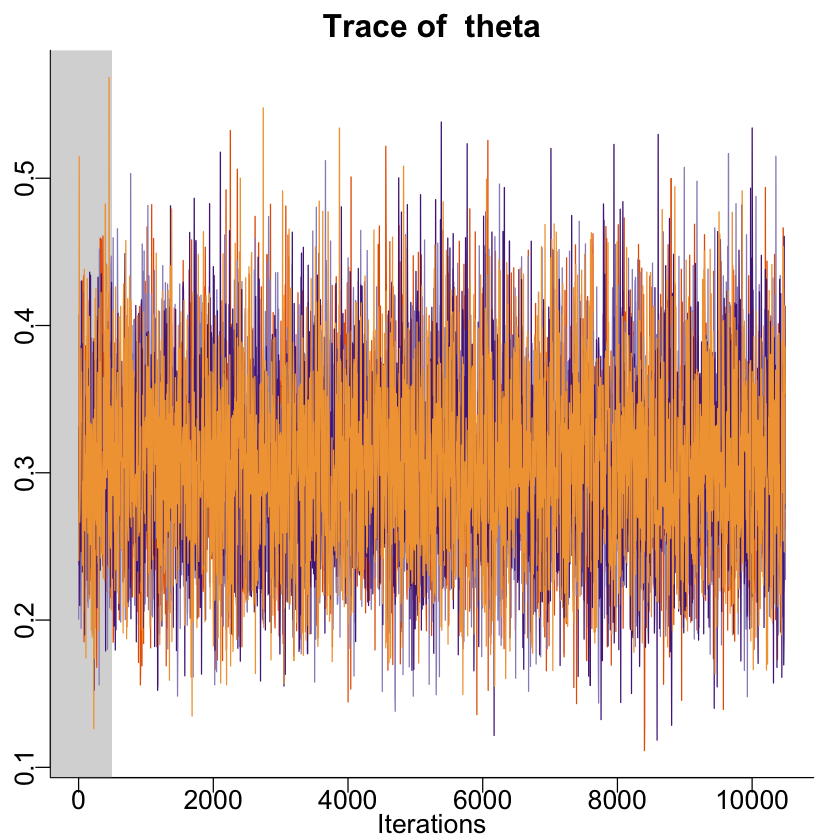

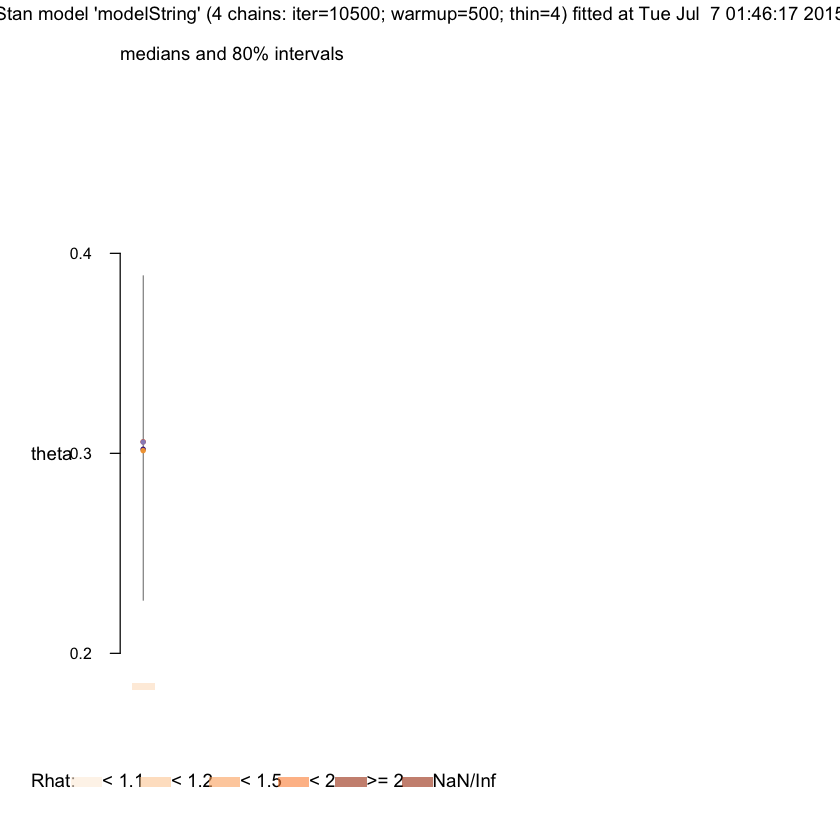

In [21]:
#------------------------------------------------------------------------------- 
# Use Stan display functions instead of DBDA2E functions:
# Load the stanFit object that was saved by genMCMC:
load("Stan-Ydich-Xnom1subj-MbernBeta-StanFit.Rdata")
# Display information:
show(stanFit)
openGraph()
traceplot(stanFit,pars=c("theta"))
openGraph()
plot(stanFit,pars=c("theta"))

# 14.4 Specify model top-down in Stan

# 14.5 Limitations and extras

# 참고자료

* [1] Doing Bayesian Data Analysis, Second Edition: A Tutorial with R, JAGS, and Stan - http://www.amazon.com/Doing-Bayesian-Analysis-Second-Edition/dp/0124058884